In [6]:
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


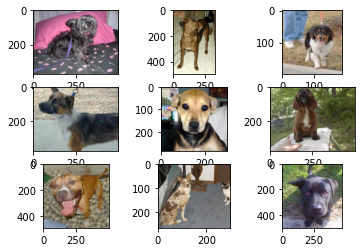

In [6]:
# plot dog photos from the 'dogs vs cats' dataset
folder = 'train/'

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = folder + 'dog.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

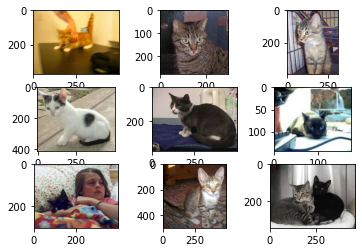

In [7]:
# plot cat photos from the 'dogs vs cats' dataset
folder = 'train/'

for i in range(9):
    pyplot.subplot(330 + 1 + i)
    filename = folder + 'cat.' + str(i) + '.jpg'
    # load image pixels
    image = imread(filename)
    # plot raw pixel data
    pyplot.imshow(image)
# show the figure
pyplot.show()

### define two functions for reading images into a DataFrame
   * **readImg_gray**: 
       1. gets file path and returns vector of the resized image in grayScale
       2. Turning the color to gray to reduce dimensions.
   * **pre**:  
       1. insert images into DataFrame
       2. add label column

In [7]:
def readImg_gray(file_path):
    img = imread(file_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized_img = cv2.resize(gray_img, (128,128))
    return resized_img

In [74]:
def pre(name, num):    
    m=12500 #number of images
    size = 128*128 #image size
    X = np.ndarray((m,size), dtype=np.uint8)
    y = np.zeros((m,1))
    folder = 'train/'
    for i in range(m):
        img = readImg_gray(folder + name+ '.' + str(i) + '.jpg')
        X[i,:] = np.squeeze(img.reshape((size,1)))
        y[i,0] = num
        
        df = pd.DataFrame(X)
        df['label'] = y
    return df

**cat = 0, dog = 1**

In [79]:
df_cat = pre('cat',0)
df_dog = pre('dog',1)

**concat both dataFrames into one**

In [80]:
df = pd.concat([df_cat, df_dog])
df.shape

(25000, 16385)

In [81]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
0,145,151,152,157,159,162,164,167,168,170,...,1,1,1,1,1,1,1,1,1,0.0
1,43,45,45,62,42,47,41,43,43,44,...,48,55,44,68,66,71,47,36,33,0.0
2,50,54,36,58,46,124,164,173,200,190,...,32,49,53,52,45,43,33,30,192,0.0
3,123,119,109,104,142,173,166,165,167,102,...,152,181,147,199,132,124,151,161,161,0.0
4,129,143,147,152,159,160,167,167,167,172,...,10,13,10,12,11,12,13,14,15,0.0


In [82]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
12495,29,26,33,54,77,88,88,84,82,83,...,121,123,127,125,120,112,117,113,89,1.0
12496,34,35,45,43,51,40,35,30,28,23,...,90,71,87,67,117,108,53,47,49,1.0
12497,219,207,207,137,135,113,97,90,68,61,...,165,161,150,151,153,157,162,162,149,1.0
12498,199,206,209,213,215,217,217,219,219,220,...,46,36,48,40,92,48,37,89,37,1.0
12499,196,204,201,192,196,197,204,204,197,201,...,108,110,74,116,116,70,101,125,99,1.0


### because our dataFrame is a merge of the dog_df and the cat_df, we will shuffle it 

In [83]:
df = df.sample(frac=1)

In [84]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,label
1031,70,73,71,71,72,75,78,72,68,62,...,70,64,58,41,39,47,38,56,47,0.0
7448,148,145,150,149,147,151,155,153,151,149,...,190,202,208,213,196,178,156,138,124,0.0
458,77,79,81,84,86,87,88,91,86,85,...,122,110,118,119,112,104,100,102,108,0.0
11832,108,49,25,96,100,5,20,81,20,15,...,138,139,133,135,136,136,131,137,137,1.0
68,247,244,240,237,241,241,239,237,237,239,...,209,215,223,216,206,196,199,219,229,0.0


In [85]:
y = df['label']
X = df.drop(['label'], axis=1).to_numpy()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## pca - dimensionality reduction
    original image: 784 fitures
    image after pca: 15 fitures

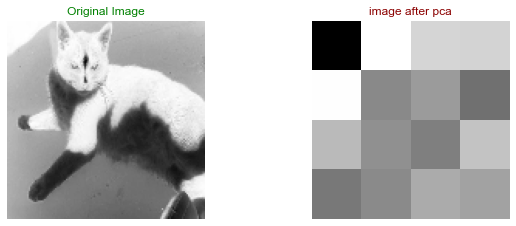

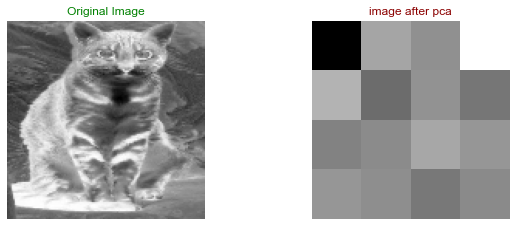

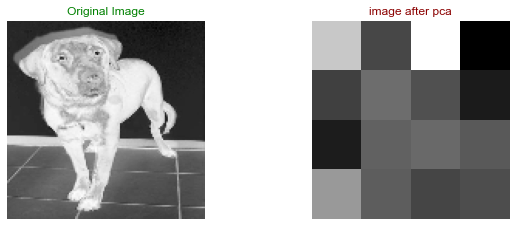

In [88]:
# visualization - 'original image' (784 fitures) vs 'image after pca' (16 fitures) 
pca = PCA(n_components=16)
X_train_reduced = pca.fit_transform(X_train)

for i in range(3):
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 2, 1)
    plt.imshow(X_test[i].reshape(128,128), cmap="gist_yarg")
    plt.title("Original Image", color = "green")
    plt.axis("off")

    plt.subplot(2, 2, 2)
    plt.imshow(X_train_reduced[i].reshape(4,4), cmap="gist_yarg")
    plt.title("image after pca", color = "Darkred")
    plt.axis("off")
    plt.show()

### pipe function:
pipeline:
   1. scale by StandardScaler
   2. dimensionality reduction by PCA
   3. model <br>
   
fit&predict:
   4. fit
   5. return score

In [20]:
#pipeLine function: scale by StandardScaler, dimensionality reduction by PCA, call a model
#def pipeLine(model):
 #   pipeline = Pipeline([('scaler1', StandardScaler()),
  #                      ('pca1', PCA(n_components=15)),
   #                     ('mod', model)])
    #return pipeline

In [89]:
#pipeline - fit & score
def pipe(model):
    p = Pipeline([('scaler1', StandardScaler()),
                        ('pca1', PCA(n_components=15)),
                        ('mod', model)])
    p.fit(X_train, y_train)
    return round(p.score(X_test, y_test),4)

---------------------------------------------------------

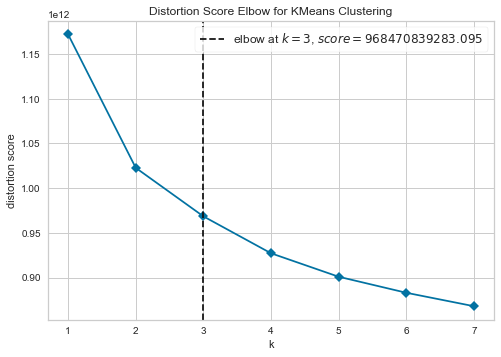

In [69]:
#Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(1,8), timings=False)
visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [70]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)

In [71]:
y_kmeans

array([1, 1, 2, ..., 2, 2, 0])

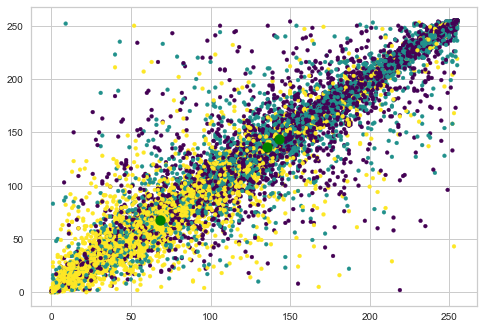

In [72]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_kmeans, s=15, cmap='viridis')

#plot the clusters center
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=100, alpha=1);

In [73]:
kmeans.score(X_test, y_test)

-412547408076.8488

In [42]:
#lr = pipe(LogisticRegression())
#lr

In [90]:
rf = pipe(RandomForestClassifier())
rf

0.6189

In [91]:
knn = pipe(KNeighborsClassifier(n_neighbors=7))
knn

0.5968

In [92]:
ada = pipe(AdaBoostClassifier(random_state=70, n_estimators=200, learning_rate=0.2, algorithm='SAMME'))
ada

0.5939

In [98]:
xgb = pipe(XGBClassifier())
xgb

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:53:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6271

In [95]:
#voting
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1', PCA(n_components=15)),
    ('clf', VotingClassifier([
        ('rf', RandomForestClassifier()),
        ('knn',KNeighborsClassifier(n_neighbors=7)),
        ('xgb', XGBClassifier()),
        ('lr', LogisticRegression())],voting='soft')), ])

pipeline.fit(X_train, y_train)
round(pipeline.score(X_test, y_test),4)

C:\Users\PC\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.6192

In [99]:
#stacking
pipeline = Pipeline([
    ('scaler1', StandardScaler()),
    ('pca1', PCA(n_components=15)),
    ('stack', StackingClassifier([
        ('rf', RandomForestClassifier()),    
        ('knn', KNeighborsClassifier(n_neighbors=7))]))])

pipeline.fit(X_train, y_train)
round(pipeline.score(X_test, y_test),4)

0.6148